In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [111]:
df = pd.read_csv('accident.csv')
print(df.head(50))

    Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0    56  Female             27.0          No            No         1
1    69  Female             46.0          No           Yes         1
2    46    Male             46.0         Yes           Yes         0
3    32    Male            117.0          No           Yes         0
4    60  Female             40.0         Yes           Yes         0
5    25    Male             49.0         Yes           Yes         1
6    38    Male            116.0         Yes           Yes         1
7    56    Male             47.0         Yes           Yes         1
8    36  Female             83.0         Yes            No         1
9    40  Female            116.0         Yes            No         1
10   28  Female             88.0          No           Yes         1
11   28    Male             80.0         Yes           Yes         1
12   41    Male             67.0         Yes            No         1
13   53  Female             38.0  

In [112]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB
None


In [113]:
print(df.describe())

             Age  Speed_of_Impact   Survived
count  200.00000       197.000000  200.00000
mean    43.42500        70.441624    0.50500
std     14.94191        30.125298    0.50123
min     18.00000        20.000000    0.00000
25%     31.00000        43.000000    0.00000
50%     43.50000        71.000000    1.00000
75%     56.00000        95.000000    1.00000
max     69.00000       119.000000    1.00000


In [114]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Speed_of_Impact'].fillna(df['Speed_of_Impact'].median(), inplace=True)

df['Helmet_Used'].fillna('No', inplace=True)
df['Seatbelt_Used'].fillna('No', inplace=True)


In [115]:
df['Helmet_Used'] = df['Helmet_Used'].astype(str)
df['Seatbelt_Used'] = df['Seatbelt_Used'].astype(str)


df['Helmet_Used'] = df['Helmet_Used'].str.strip().str.lower()
df['Seatbelt_Used'] = df['Seatbelt_Used'].str.strip().str.lower()


df['Helmet_Used'] = df['Helmet_Used'].replace({'1': 'yes', '0': 'no'})
df['Seatbelt_Used'] = df['Seatbelt_Used'].replace({'1': 'yes', '0': 'no'})


df['Helmet_Used'] = df['Helmet_Used'].map({'yes': 1, 'no': 0})
df['Seatbelt_Used'] = df['Seatbelt_Used'].map({'yes': 1, 'no': 0})


le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [116]:
df.isnull().sum()

Age                0
Gender             0
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

In [117]:
df.fillna(df.median(numeric_only=True), inplace=True)


In [118]:
print(df.dtypes)

Age                  int64
Gender               int64
Speed_of_Impact    float64
Helmet_Used          int64
Seatbelt_Used        int64
Survived             int64
dtype: object


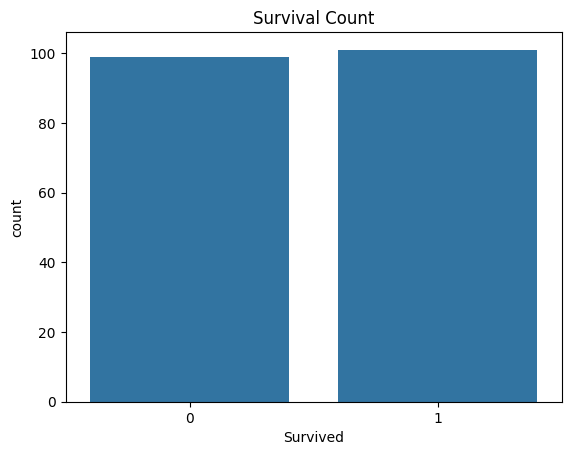

In [119]:
plt.figure()
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

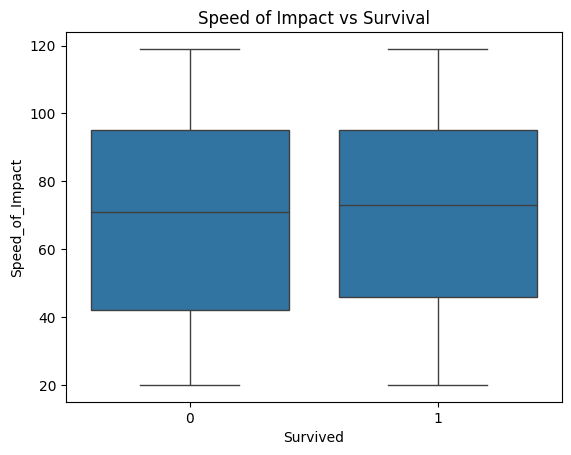

In [120]:
plt.figure()
sns.boxplot(x='Survived', y='Speed_of_Impact', data=df)
plt.title('Speed of Impact vs Survival')
plt.show()

In [121]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [123]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [124]:
model = LogisticRegression()
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [125]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.55


In [126]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[15  7]
 [11  7]]


In [127]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.68      0.62        22
           1       0.50      0.39      0.44        18

    accuracy                           0.55        40
   macro avg       0.54      0.54      0.53        40
weighted avg       0.54      0.55      0.54        40



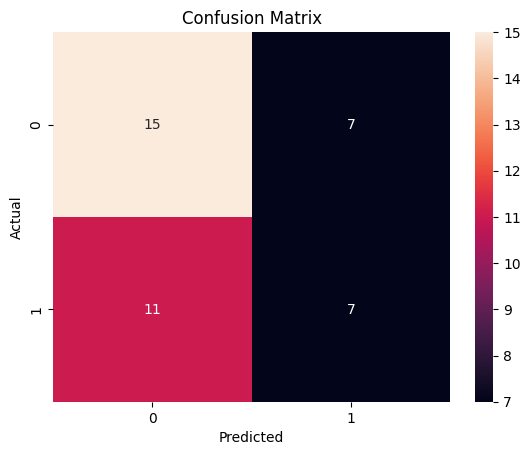

In [128]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [129]:
feature_names = X.columns
coefficients = model.coef_[0]

for f, c in zip(feature_names, coefficients):
    print(f"{f}: {c}")

Age: 0.16715125755235793
Gender: 0.35762270341271896
Speed_of_Impact: -0.029046409051741655
Helmet_Used: -0.1373995967306778
Seatbelt_Used: 0.1263711920112785


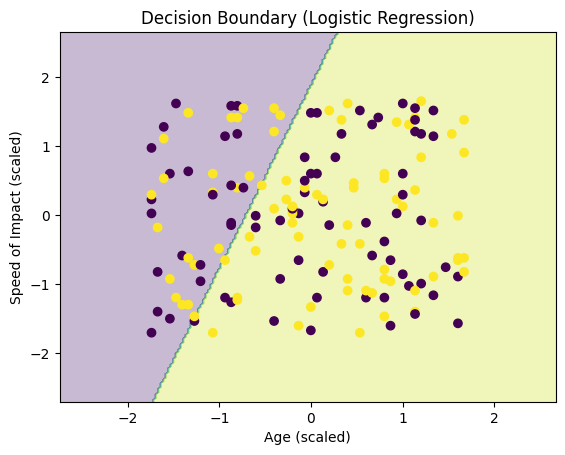

In [130]:
from sklearn.linear_model import LogisticRegression


X2 = df[['Age', 'Speed_of_Impact']]
y2 = df['Survived']


X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)


scaler2 = StandardScaler()
X2_train = scaler2.fit_transform(X2_train)
X2_test = scaler2.transform(X2_test)


model2 = LogisticRegression()
model2.fit(X2_train, y2_train)


x_min, x_max = X2_train[:, 0].min() - 1, X2_train[:, 0].max() + 1
y_min, y_max = X2_train[:, 1].min() - 1, X2_train[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2_train[:, 0], X2_train[:, 1], c=y2_train)
plt.xlabel("Age (scaled)")
plt.ylabel("Speed of Impact (scaled)")
plt.title("Decision Boundary (Logistic Regression)")
plt.show()

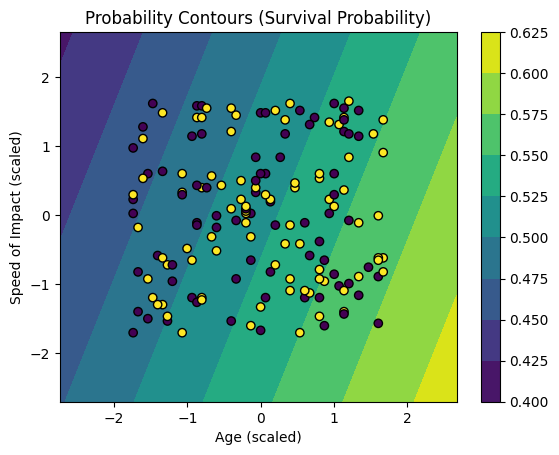

In [131]:
Z_prob = model2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z_prob = Z_prob.reshape(xx.shape)

plt.figure()
contour = plt.contourf(xx, yy, Z_prob, cmap="viridis")
plt.colorbar(contour)
plt.scatter(X2_train[:, 0], X2_train[:, 1], c=y2_train, edgecolors='k')
plt.xlabel("Age (scaled)")
plt.ylabel("Speed of Impact (scaled)")
plt.title("Probability Contours (Survival Probability)")
plt.show()

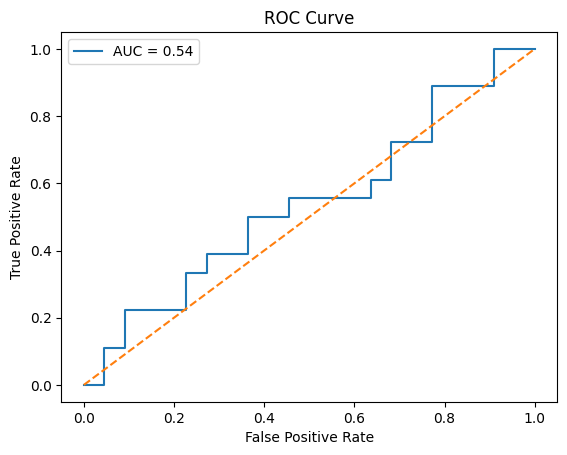

In [132]:
from sklearn.metrics import roc_curve, auc


y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [133]:
new_data = [[30, 1, 70, 1, 1]] # Age, Gender, Speed, Helmet, Seatbelt
new_data = [[25, 1, 100, 0, 1]] 
new_data = scaler.transform(new_data)

prediction = model.predict(new_data)
print("Survived:", prediction[0])

Survived: 1


C:\Users\shaur\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
